# Exploracion de datos

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

vuelos = 'C:\\Users\\max80\\OneDrive\\Documents\\DATATHON 2024\\Filghts TEC_Valid.csv'
compras = 'C:\\Users\\max80\\OneDrive\\Documents\\DATATHON 2024\\Sales TEC_Valid.csv'

df_vuelos = pd.read_csv(vuelos)
df_compras = pd.read_csv(compras)

n_vuelos = df_vuelos.shape[0]
n_compras = df_compras.shape[0]

vacios_vuelos = df_vuelos.isna()
vacios_vuelos = vacios_vuelos.sum()

vacios_compras = df_compras.isna()
vacios_compras = vacios_compras.sum()

#display(df_vuelos)

In [109]:
print("La base de vuelos tiene:", n_vuelos,"lineas")
print("La base de compras tiene:", n_compras,"lineas")

La base de vuelos tiene: 245753 lineas
La base de compras tiene: 2564361 lineas


In [110]:
print(vacios_vuelos)

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64


In [111]:
print(vacios_compras)

Flight_ID      0
ProductType    0
ProductName    0
Quantity       0
TotalSales     0
dtype: int64


In [112]:
total_ID = df_vuelos['Flight_ID'].nunique()
print(total_ID)

ID  = df_vuelos['Flight_ID'].value_counts()
ID = pd.DataFrame(ID)
ID = ID.sort_values(by = 'count', ascending = False)
#display(ID)

238055


In [113]:
df_vuelos['STD'] = pd.to_datetime(df_vuelos['STD'])
df_vuelos['Año'] = df_vuelos['STD'].dt.year
df_vuelos['Mes'] = df_vuelos['STD'].dt.month

df_vuelos = df_vuelos.sort_values(by = 'STD', ascending = True)

pasajeros_mes = df_vuelos.groupby(['Año', 'Mes'])['Passengers'].sum()

#plt.figure(figsize=(10, 6))
#pasajeros_mes.plot(marker='o', linestyle='-', color='burlywood', label='Total Pasajeros por mes')

#plt.xlabel('Fecha')
#plt.ylabel('Pasajeros')
#plt.title('Pasajeros 2023')
#plt.legend()
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# Creacion de base final

In [114]:
df_final = df_vuelos.dropna()
#comprasxvuelo = df_compras[["Flight_ID","Quantity","TotalSales"]].groupby("Flight_ID").sum().reset_index()
#comprasxvuelo = pd.DataFrame(comprasxvuelo)
#mapeo_compras = dict(zip(comprasxvuelo["Flight_ID"], comprasxvuelo["TotalSales"]))

#df_final['TotalSales'] = df_final["Flight_ID"].map(mapeo_compras)
df_final['Time'] = df_final['STD'].dt.time
df_final["Route"] = df_final["DepartureStation"] + "+" + df_final["ArrivalStation"]
df_final["Occupation fraction"] = df_final["Passengers"] / df_final["Capacity"]
#display(df_final)

C:\Users\max80\AppData\Local\Temp\ipykernel_5328\898089292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Time'] = df_final['STD'].dt.time
C:\Users\max80\AppData\Local\Temp\ipykernel_5328\898089292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Route"] = df_final["DepartureStation"] + "+" + df_final["ArrivalStation"]
C:\Users\max80\AppData\Local\Temp\ipykernel_5328\898089292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

# Asignacion de inputs y output

In [115]:
categorias = df_final[['Route','Time']]
numericas = df_final[['Mes','Capacity']]

encoder = LabelEncoder()  #Codificador de categorias
categorias = categorias.apply(encoder.fit_transform) #Codificacion

X = pd.concat([pd.DataFrame(numericas), categorias], axis=1) #Inputs array
Y = df_final['Occupation fraction']  #Output

# Red neuronal de 5 capas y entrenamiento

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)  #Particion de los datos de output en entrenamiento y prueba

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(8, activation='relu'),   
    tf.keras.layers.Dense(4, activation='relu'),  
    tf.keras.layers.Dense(1)                      
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')   #Compilador del modelo, optimizador y funcion de error
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))  #Entrenamiento

Epoch 1/40


C:\Users\max80\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3044/3044 ━━━━━━━━━━━━━━━━━━━━ 4s 796us/step - loss: 0.2765 - val_loss: 0.0332
Epoch 2/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step - loss: 0.0255 - val_loss: 0.0225
Epoch 3/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step - loss: 0.0229 - val_loss: 0.0218
Epoch 4/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - loss: 0.0224 - val_loss: 0.0219
Epoch 5/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - loss: 0.0223 - val_loss: 0.0214
Epoch 6/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - loss: 0.0216 - val_loss: 0.0209
Epoch 7/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 770us/step - loss: 0.0215 - val_loss: 0.0211
Epoch 8/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - loss: 0.0211 - val_loss: 0.0209
Epoch 9/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - loss: 0.0212 - val_loss: 0.0208
Epoch 10/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - loss: 0.0209 - val_loss: 0.0207
Epoch 11/40
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 12/40
3044/30

# Prueba de errores con datos conocidos

In [117]:
prediccion_23 = model.predict(X)
prediccion_23 = prediccion_23.flatten()
df_final['Neurona'] = prediccion_23

3804/3804 ━━━━━━━━━━━━━━━━━━━━ 2s 488us/step


C:\Users\max80\AppData\Local\Temp\ipykernel_5328\1451501567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Neurona'] = prediccion_23


In [118]:
df_final['ERROR'] = (df_final['Occupation fraction'] - df_final['Neurona'])**2
error_medio = df_final['ERROR'].mean()
df_final['Passengers Prediction'] = df_final['Neurona'] * df_final['Capacity']
display(df_final)

print("El error promedio entre las predicciones es del:",error_medio*100,"%")

C:\Users\max80\AppData\Local\Temp\ipykernel_5328\3774152266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ERROR'] = (df_final['Occupation fraction'] - df_final['Neurona'])**2
C:\Users\max80\AppData\Local\Temp\ipykernel_5328\3774152266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Passengers Prediction'] = df_final['Neurona'] * df_final['Capacity']


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Año,Mes,Time,Route,Occupation fraction,Neurona,ERROR,Passengers Prediction
6696,030f35839975b1721e2427db425ef402,XA-VAJ,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-01-02 00:20:00,2023-01-02 05:20:00,186,120.0,68.0,2023,1,00:20:00,BM+AV,0.645161,0.820762,0.030835,152.661662
178553,7b9f51daca0f560676d28aee3d5666f7,XA-VAW,BM,BA,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:30:00,2023-01-02 06:00:00,186,170.0,99.0,2023,1,00:30:00,BM+BA,0.913978,0.817476,0.009313,152.050498
53258,d4ac6f26a94efea00002147f15d96a41,XA-VIU,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:35:00,2023-01-02 05:30:00,186,185.0,89.0,2023,1,00:35:00,BM+AO,0.994624,0.814606,0.032407,151.516629
123223,555496d4217768d1cc276ffbe83235d5,XA-VXF,AT,AU,Ecoturismo,Ciudad Principal,2023-01-02 00:55:00,2023-01-02 02:45:00,240,168.0,118.0,2023,1,00:55:00,AT+AU,0.700000,0.907559,0.043081,217.814155
53248,01cb03565042d43a1deafae09eef0ca1,XA-VAN,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 01:15:00,2023-01-02 06:10:00,186,165.0,92.0,2023,1,01:15:00,BM+AO,0.887097,0.777458,0.012021,144.607135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221868,a665d50e95bf905d862563facacbf05a,XA-VXA,AO,BM,Ciudad Fronteriza,Ciudad Principal,2023-12-31 23:00:00,2024-01-01 00:05:00,240,201.0,90.0,2023,12,23:00:00,AO+BM,0.837500,0.854344,0.000284,205.042591
92561,6dda5bd834419dd5b900408b0f5fd77b,XA-VAU,BM,AT,Ciudad Principal,Ciudad Fronteriza,2023-12-31 23:05:00,2024-01-01 04:30:00,186,131.0,81.0,2023,12,23:05:00,BM+AT,0.704301,0.826494,0.014931,153.727891
105522,c711d31ee17b65d788d2df7ebde346f1,XA-VBI,AK,AT,Ciudad Principal,Playa,2023-12-31 23:15:00,2024-01-01 00:45:00,220,217.0,126.0,2023,12,23:15:00,AK+AT,0.986364,0.970125,0.000264,213.427426
57082,dc6b4fa09794681fbf19cdd98f5a942e,XA-VIF,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-12-31 23:45:00,2024-01-01 04:40:00,186,168.0,75.0,2023,12,23:45:00,BM+AO,0.903226,0.800222,0.010610,148.841288


El error promedio entre las predicciones es del: 1.9806525207928134 %


# Predicción de los datos para 2024

In [119]:
df_predict = df_vuelos.loc[df_vuelos['Año'] == 2024 & 2025]
df_predict['Time'] = df_predict['STD'].dt.time
df_predict["Route"] = df_predict["DepartureStation"] + "+" + df_predict["ArrivalStation"]

categorias_pre = df_predict[['Route','Time']]
numericas_pre = df_predict[['Mes','Capacity']]

encoder = LabelEncoder()
categorias_pre = categorias_pre.apply(encoder.fit_transform) #Codificacion

X_pre = pd.concat([pd.DataFrame(numericas_pre), categorias_pre], axis=1) #Inputs prediccion
prediccion_pasajeros = model.predict(X_pre)
prediccion_pasajeros = prediccion_pasajeros.flatten()
df_predict['Prediccion de NN'] = prediccion_pasajeros
display(df_predict)

   1/3807 ━━━━━━━━━━━━━━━━━━━━ 1:08 18ms/step

C:\Users\max80\AppData\Local\Temp\ipykernel_5328\2707537337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Time'] = df_predict['STD'].dt.time
C:\Users\max80\AppData\Local\Temp\ipykernel_5328\2707537337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict["Route"] = df_predict["DepartureStation"] + "+" + df_predict["ArrivalStation"]


3807/3807 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step


C:\Users\max80\AppData\Local\Temp\ipykernel_5328\2707537337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Prediccion de NN'] = prediccion_pasajeros


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Año,Mes,Time,Route,Prediccion de NN
4663,5af600e8e3131804971e9764659a4e50,XA-VIY,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2024-01-01 00:05:00,2024-01-01 05:05:00,186,NaN,NaN,2024,1,00:05:00,BM+AV,0.823574
54136,aa14abe062912b5497a400a8f3473407,XA-VBT,BM,AO,Ciudad Principal,Ciudad Fronteriza,2024-01-01 00:30:00,2024-01-01 05:25:00,220,NaN,NaN,2024,1,00:30:00,BM+AO,0.781136
182265,803b0d7b2c8ae03f9f098eb1686d683a,XA-VXJ,BM,BB,Ecoturismo,Ciudad Fronteriza,2024-01-01 00:55:00,2024-01-01 06:40:00,240,NaN,NaN,2024,1,00:55:00,BM+BB,0.738497
9935,479ec62310c8a89c85914816e29e81ec,XA-VAA,BM,AD,MX Amigos y Familia,Ciudad Fronteriza,2024-01-01 01:00:00,2024-01-01 05:50:00,186,NaN,NaN,2024,1,01:00:00,BM+AD,0.805278
172070,26a1ddf4c763fc84f7734ef5308cf6de,XA-VAP,BM,BA,Ciudad Principal,Ciudad Fronteriza,2024-01-01 01:00:00,2024-01-01 06:15:00,186,NaN,NaN,2024,1,01:00:00,BM+BA,0.807559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61970,28023a973f3549f6aa8137a4d77edf56,NaN,AW,AO,Ciudad Principal,Ciudad Principal,2024-12-31 19:25:00,2024-12-31 21:00:00,186,NaN,NaN,2024,12,19:25:00,AW+AO,0.851563
86122,1055cf9182d8c679ff176c6ab61c5cc9,NaN,AO,AT,Ciudad Principal,Ciudad Principal,2024-12-31 20:10:00,2024-12-31 21:40:00,180,NaN,NaN,2024,12,20:10:00,AO+AT,0.858880
196391,e186466ea508a0b053312c424546f2f4,NaN,AT,BE,Playa,Ciudad Principal,2024-12-31 20:20:00,2024-12-31 21:35:00,220,NaN,NaN,2024,12,20:20:00,AT+BE,0.948239
180475,e498ec13ae5b9493354e63f414d684c9,NaN,BT,BA,Ciudad Principal,Playa,2024-12-31 21:05:00,2024-12-31 22:20:00,186,NaN,NaN,2024,12,21:05:00,BT+BA,0.856390


C:\Users\max80\AppData\Local\Temp\ipykernel_5328\3251564317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Passengers'] = df_predict['Prediccion de NN']*df_predict['Capacity']


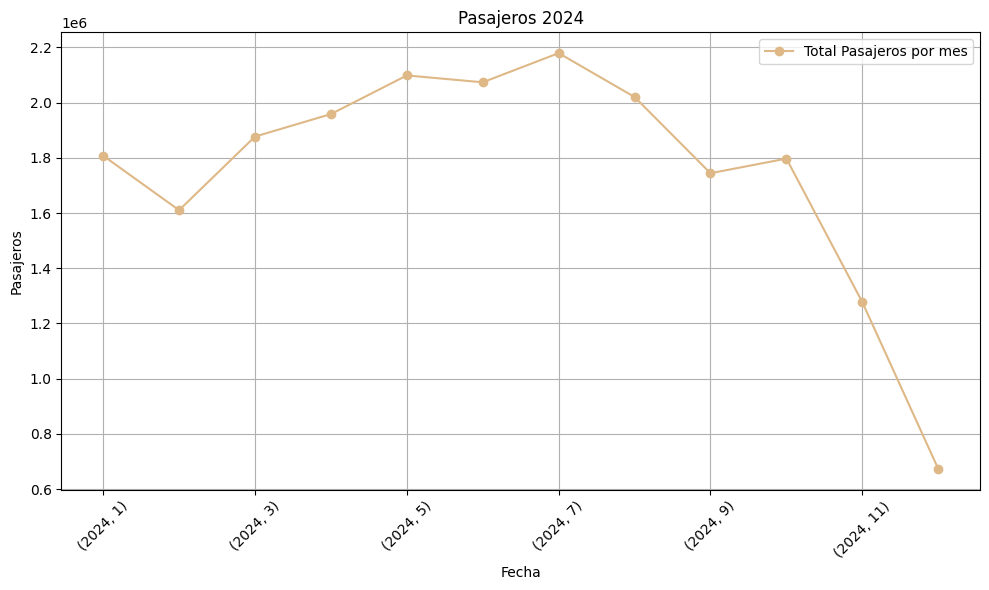

In [121]:
df_predict['Passengers'] = df_predict['Prediccion de NN']*df_predict['Capacity']
pasajeros_mes = df_predict.groupby(['Año', 'Mes'])['Passengers'].sum()

plt.figure(figsize=(10, 6))
pasajeros_mes.plot(marker='o', linestyle='-', color='burlywood', label='Total Pasajeros por mes')

plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.title('Pasajeros 2024')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()